In [168]:
import sys, os
import numpy as np
import scipy.linalg as sc
from scipy import sparse as spa
from scipy.sparse.linalg import eigsh
import qiskit
import qiskit.quantum_info as q
from qiskit import QuantumCircuit as qc
from qiskit.quantum_info import SparsePauliOp as sp
from qiskit.quantum_info import SparseObservable as obs
from qiskit.quantum_info import Operator as op
ops = obs.BitTerm
assert ops.X is obs.BitTerm.X
assert ops.Z is obs.BitTerm.Z

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import networkx as nx
np.set_printoptions(suppress=True,precision=3)

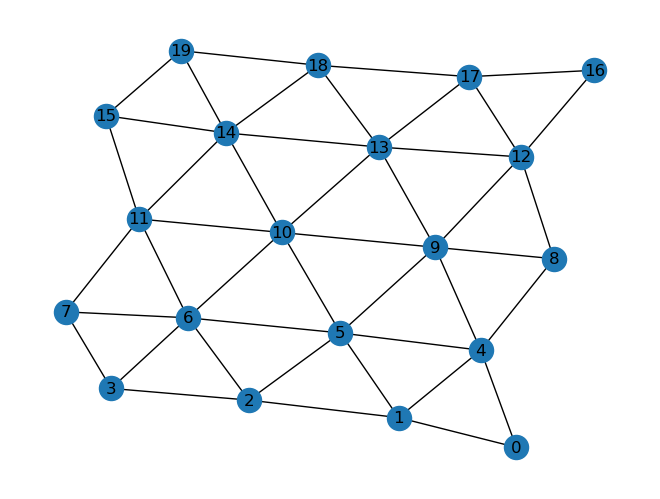

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 6, 10, 3, 9, 5, 2, 11, 7, 1, 8, 4]


In [49]:
#Triangular lattice. We identify boundaries and finally have 12 sites labelled from 0 to 11.
m = 4
n = 6
isPBC = False
lattice = nx.generators.lattice.triangular_lattice_graph(m, n, periodic=isPBC)
lattice = nx.convert_node_labels_to_integers(lattice)
pos = nx.spring_layout(lattice, seed=2, iterations=1000)
nx.draw(lattice, pos=pos, with_labels=True)
plt.show(block=False)
print(list(lattice.nodes))
mapping = {19 : 0,
           15 : 1,
           11 : 2,
          7 : 3,
          3 : 0,
          14 : 4,
          6 : 5,
          18 : 6,
          10 : 7,
          2 : 10,
          13 : 8,
          5 : 9,
          17 : 10,
          9 : 11,
          1 : 6,
          16 : 0,
          12 : 1,
          8 : 2,
          4 : 3}
lat_12 = nx.relabel_nodes(lattice, mapping)
nodes_12 = list(lat_12.nodes)
print(nodes_12)
mapping2 = {19 : 0,
           15 : 1,
           11 : 2,
          7 : 3,
          3 : 0,
          14 : 4,
          6 : 5,
          18 : 6,
          10 : 7,
          2 : 6,
          13 : 8,
          5 : 9,
          17 : 10,
          9 : 11,
          1 : 10,
          16 : 0,
          12 : 3,
          8 : 2,
          4 : 1}
lat_122 = nx.relabel_nodes(lattice, mapping2)
mappingt = {19 : 0,
           15 : 1,
           11 : 2,
          7 : 3,
          3 : 0,
          14 : 4,
          6 : 5,
          18 : 6,
          10 : 7,
          2 : 6,
          13 : 8,
          5 : 9,
          17 : 10,
          9 : 11,
          1 : 10,
          16 : 0,
          12 : 1,
          8 : 2,
          4 : 3}
lat_12t = nx.relabel_nodes(lattice, mappingt)
nodes_12t = list(lat_12t.nodes)

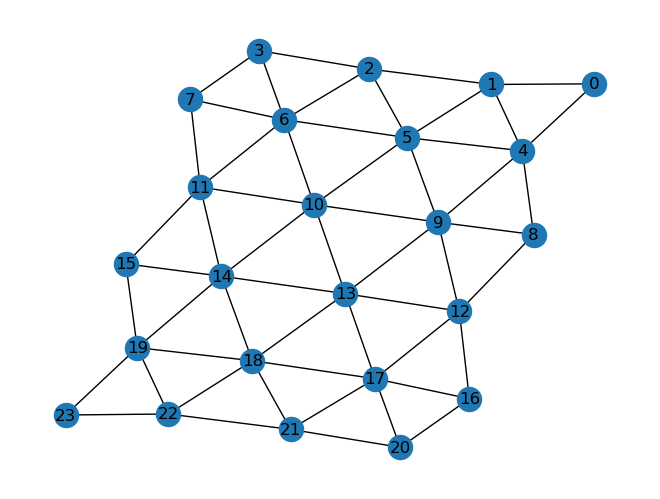

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 10, 6, 1, 8, 4, 2, 11, 7, 3, 9, 5, 12, 14, 13]
[0, 6, 8, 1, 13, 12]


In [51]:
#Triangular lattice. We identify boundaries and finally have 12 sites labelled from 0 to 11.
#N =15
m = 5
n = 6
isPBC = False
lattice = nx.generators.lattice.triangular_lattice_graph(m, n, periodic=isPBC)
lattice = nx.convert_node_labels_to_integers(lattice)
pos = nx.spring_layout(lattice, seed=13, iterations=1000)
nx.draw(lattice, pos=pos, with_labels=True)
plt.show(block=False)
print(list(lattice.nodes))
mapping = {3 : 0,
           23 : 0,
           20 : 0,
           4 : 1,
           7 : 1,
           11 : 2,
            8 : 2,
           15 : 3,
           12 : 3,
            6 : 4,
            14 : 5,
            2 : 6,
            21 : 6,
            10 : 7,
            5 : 8,
            13 : 9,
            1 : 10,
            22 : 10,
            9 : 11,
           19 : 12,
           16 : 12,
            18 : 13,
           17 : 14}
lat_15 = nx.relabel_nodes(lattice, mapping)
nodes_15 = list(lat_15.nodes)
print(nodes_15)
print(list(lat_15.neighbors(10)))
mappingt = {3 : 0,
           23 : 0,
           20 : 0,
           4 : 1,
           7 : 1,
           11 : 2,
            8 : 2,
           15 : 3,
           12 : 3,
            6 : 4,
            14 : 5,
            2 : 6,
            22 : 6,
            10 : 7,
            5 : 8,
            13 : 9,
            1 : 10,
            21 : 10,
            9 : 11,
           19 : 12,
           16 : 12,
            18 : 13,
           17 : 14}
lat_15t = nx.relabel_nodes(lattice, mappingt)
nodes_15t = list(lat_15t.nodes)

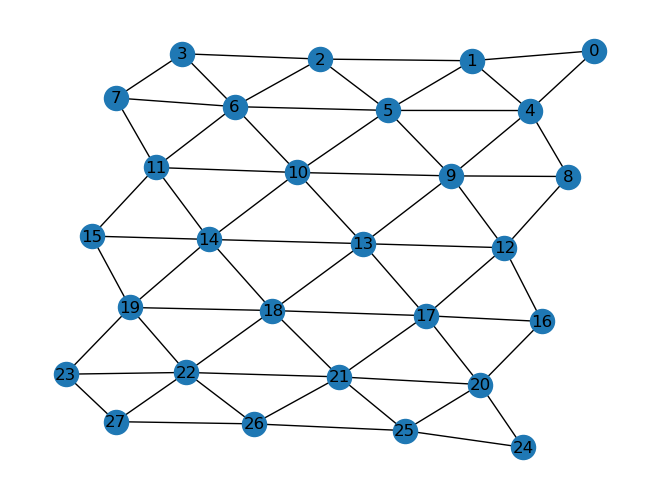

In [55]:
m = 6
n = 6
isPBC = False
lattice = nx.generators.lattice.triangular_lattice_graph(m, n, periodic=isPBC)
lattice = nx.convert_node_labels_to_integers(lattice)
pos = nx.spring_layout(lattice, seed=13, iterations=1000)
nx.draw(lattice, pos=pos, with_labels=True)
plt.show(block=False)
mapping = {3 : 0,
           27 : 0,
           24 : 0,
           4 : 1,
           7 : 1,
           8 : 2,
            11 : 2,
           15 : 3,
           12 : 3,
           6 : 4,
           14 : 5,
           2 : 6,
           25 : 6,
           10 : 7,
           5 : 8,
           13 : 9,
           1 : 10,
           26 : 10,
           9 : 11,
           19 : 12,
           16 : 12,
           18 : 13,
            17 : 14,
            20 : 15,
           23 : 15,
           22 : 16,
           21 : 17
          }

mapping_t = {3 : 0,
           27 : 0,
           24 : 0,
           4 : 1,
           7 : 1,
           8 : 2,
            11 : 2,
           15 : 3,
           12 : 3,
           6 : 4,
           14 : 5,
           2 : 6,
           10 : 7,
           5 : 8,
           13 : 9,
           1 : 10,
           25 : 10,
           26 : 6,
           9 : 11,
           19 : 12,
           16 : 12,
           18 : 13,
            17 : 14,
            20 : 15,
           23 : 15,
           22 : 16,
           21 : 17
          }
lat_18 = nx.relabel_nodes(lattice, mapping)
nodes_18 = list(lat_18.nodes)
lat_18t = nx.relabel_nodes(lattice, mapping_t)
nodes_18t = list(lat_18t.nodes)

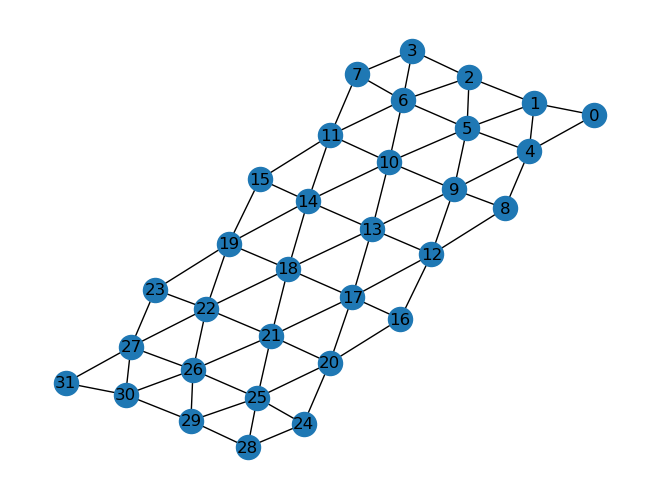

In [71]:
m = 7
n = 6
isPBC = False
lattice = nx.generators.lattice.triangular_lattice_graph(m, n, periodic=isPBC)
lattice = nx.convert_node_labels_to_integers(lattice)
pos = nx.spring_layout(lattice, seed=40, iterations=1000)
nx.draw(lattice, pos=pos, with_labels=True)
plt.show(block=False)
mapping = {3 : 0,
           28 : 0,
           31 : 0,
           4 : 1,
           7 : 1,
           8 : 2,
           11 : 2,
           15 : 3,
           12 : 3,
           6 : 4,
           14 : 5,
           2 : 6,
           29 : 6,
           10 : 7,
           5 : 8,
           13 : 9,
           1 : 10,
           30 : 10,
           9 : 11,
           19 : 12,
           16 : 12,
           18 : 13,
           17 : 14,
           20 : 15,
           23 : 15,
           22 : 16,
           21 : 17,
           24 : 18,
           27 : 18,
           26 : 19,
           25 : 20
          }

mapping_t = {3 : 0,
           28 : 0,
           31 : 0,
           4 : 1,
           7 : 1,
           8 : 2,
           11 : 2,
           15 : 3,
           12 : 3,
           6 : 4,
           14 : 5,
           2 : 6,
           30 : 6,
           10 : 7,
           5 : 8,
           13 : 9,
           1 : 10,
           29 : 10,
           9 : 11,
           19 : 12,
           16 : 12,
           18 : 13,
            17 : 14,
            20 : 15,
           23 : 15,
           22 : 16,
           21 : 17,
           24 : 18,
           27 : 18,
           26 : 19,
           25 : 20
          }
lat_21 = nx.relabel_nodes(lattice, mapping)
nodes_21 = list(lat_21.nodes)
lat_21t = nx.relabel_nodes(lattice, mapping_t)
nodes_21t = list(lat_21t.nodes)

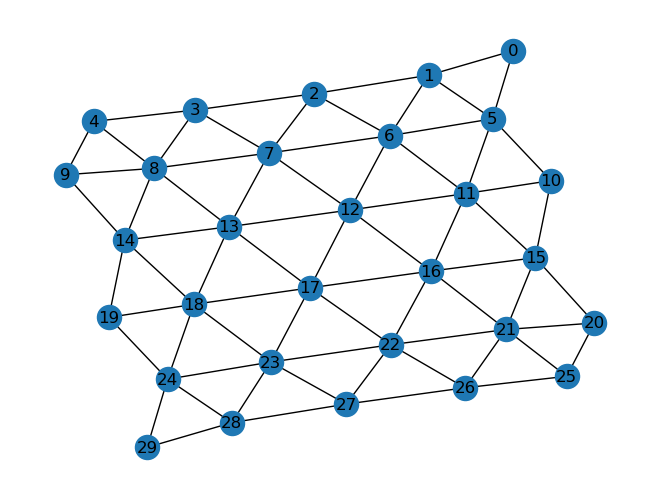

In [320]:
m = 5
n = 8
isPBC = False
lattice = nx.generators.lattice.triangular_lattice_graph(m, n, periodic=isPBC)
lattice = nx.convert_node_labels_to_integers(lattice)
pos = nx.spring_layout(lattice, seed=40, iterations=1000)
nx.draw(lattice, pos=pos, with_labels=True)
plt.show(block=False)
mapping = {4 : 0,
           25 : 0,
           29 : 0,
           5 : 1,
           9 : 1,
           10 : 2,
           14 : 2,
           15 : 3,
           19 : 3,
           8 : 4,
           18 : 5,
           3 : 6,
           26 : 6,
           13 : 7,
           7 : 8,
           17 : 9,
           2 : 10,
           27 : 10,
           12 : 11,
           24 : 12,
           20 : 12,
           23 : 13,
           22 : 14,
           28 : 15,
           1 : 15,
           6 : 16,
           11 : 17,
           16 : 18,
           21 : 19
          }

mapping_t = {4 : 0,
           25 : 0,
           29 : 0,
           5 : 1,
           9 : 1,
           10 : 2,
           14 : 2,
           15 : 3,
           19 : 3,
           8 : 4,
           18 : 5,
           3 : 6,
           28 : 6,
           13 : 7,
           7 : 8,
           17 : 9,
           2 : 10,
           27 : 10,
           12 : 11,
           24 : 12,
           20 : 12,
           23 : 13,
           22 : 14,
           26 : 15,
           1 : 15,
           6 : 16,
           11 : 17,
           16 : 18,
           21 : 19
          }

lat_20 = nx.relabel_nodes(lattice, mapping)
nodes_20 = list(lat_20.nodes)
lat_20t = nx.relabel_nodes(lattice, mapping_t)
nodes_20t = list(lat_20t.nodes)

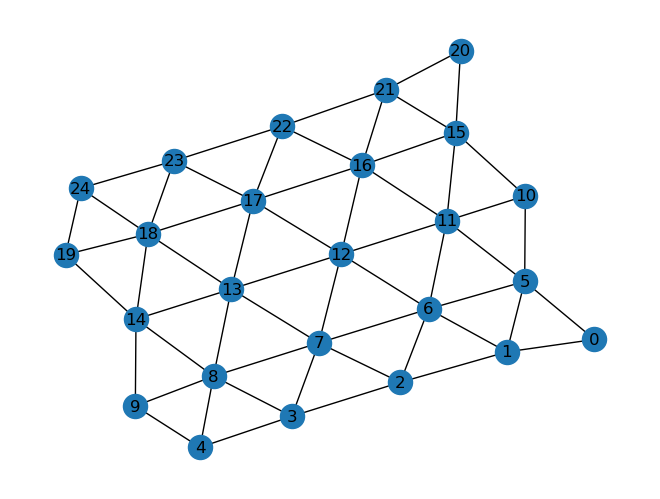

In [214]:
m = 4
n = 8
isPBC = False
lattice = nx.generators.lattice.triangular_lattice_graph(m, n, periodic=isPBC)
lattice = nx.convert_node_labels_to_integers(lattice)
pos = nx.spring_layout(lattice, seed=4, iterations=1000)
nx.draw(lattice, pos=pos, with_labels=True)
plt.show(block=False)
mapping = {4 : 0,
           24 : 0,
           20 : 0,
           15 : 1,
           19 : 1,
           10 : 2,
           14 : 2,
           5 : 3,
           9 : 3,
           18 : 4,
           8 : 5,
           23 : 6,
           1 : 6,
           13 : 7,
           17 : 8,
           7 : 9,
           2 : 10,
           22 : 10,
           12 : 11,
           3 : 12,
           21 : 12,
           16 : 13,
           6 : 14,
           11 : 15
          }

mapping_t = {4 : 0,
           24 : 0,
           20 : 0,
           15 : 1,
           19 : 1,
           10 : 2,
           14 : 2,
           5 : 3,
           9 : 3,
           18 : 4,
           8 : 5,
           23 : 6,
           3 : 6,
           13 : 7,
           17 : 8,
           7 : 9,
           2 : 10,
           22 : 10,
           12 : 11,
           1 : 12,
           21 : 12,
           16 : 13,
           6 : 14,
           11 : 15
          }

lat_16 = nx.relabel_nodes(lattice, mapping)
nodes_16 = list(lat_16.nodes)
lat_16t = nx.relabel_nodes(lattice, mapping_t)
nodes_16t = list(lat_16t.nodes)

In [322]:

def nodelist(N,t=0):
    if t==0:
        if N==12: return(list(lat_12.nodes))
        if N==9: return(list(lat_9.nodes))
        if N==15: return(list(lat_15.nodes))
        if N==16: return(list(lat_16.nodes))
        if N==18: return(list(lat_18.nodes))
        if N==20: return(list(lat_20.nodes))
        if N==21: return(list(lat_21.nodes))
    if t==1:
        if N==12: return(list(lat_12t.nodes))
        if N==9: return(list(lat_9t.nodes))
        if N==16: return(list(lat_16t.nodes))
        if N==15: return(list(lat_15t.nodes))
        if N==18: return(list(lat_18t.nodes))
        if N==20: return(list(lat_20t.nodes))
        if N==21: return(list(lat_21t.nodes))
def nb(i,N,t=0):
    if t==0:
        if N==12: return(list(lat_12.neighbors(i)))
        if N==9: return(list(lat_9.neighbors(i)))
        if N==16: return(list(lat_16.neighbors(i)))
        if N==15: return(list(lat_15.neighbors(i)))
        if N==18: return(list(lat_18.neighbors(i)))
        if N==20: return(list(lat_20.neighbors(i)))
        if N==21: return(list(lat_21.neighbors(i)))

    if t==1:
        if N==12: return(list(lat_12t.neighbors(i)))
        if N==9: return(list(lat_9t.neighbors(i)))
        if N==16: return(list(lat_16t.neighbors(i)))
        if N==15: return(list(lat_15t.neighbors(i)))
        if N==18: return(list(lat_18t.neighbors(i)))
        if N==20: return(list(lat_20t.neighbors(i)))
        if N==21: return(list(lat_21t.neighbors(i)))

#number of nn bonds = 3*N; indices: 6*N
print(nodelist(21))

[0, 10, 6, 1, 8, 4, 2, 11, 7, 3, 9, 5, 12, 14, 13, 15, 17, 16, 18, 20, 19]


In [324]:
#FLUXING: bond[i,j] = -1 for flux line
def bond1(N,t=0):
    bond = np.zeros(shape=(N,N))
    nodes = nodelist(N,t)
    for i in nodes:
        for j in nodes:
            if i in nb(j,N,t):
                if(i<j):
                    bond[i,j] = 1
    return(bond)

bonds_9 = bond1(9)
bonds_12 = bond1(12)
bonds_16 = bond1(16)
bonds_15 = bond1(15)
bonds_18 = bond1(18)
bonds_21 = bond1(21)
bonds_20 = bond1(20)
bonds_9t = bond1(9,1)
bonds_12t = bond1(12,1)
bonds_16t = bond1(16,1)
bonds_15t = bond1(15,1)
bonds_18t = bond1(18,1)
bonds_20t = bond1(20,1)
bonds_21t = bond1(21,1)
bonds_12tf = bond1(12,1)
bonds_15tf = bond1(15,1)
bonds_16tf = bond1(16,1)
bonds_18tf = bond1(18,1)
bonds_20tf = bond1(20,1)
bonds_21tf = bond1(21,1)
bonds_9f = bonds_9
bonds_12f = bonds_12
bonds_9f[4,5]  = bonds_9f[5,7] = bonds_9f[3,7] = bonds_9f[6,7] =  bonds_9f[6,8] = bonds_9f[5,6] = -1 
bonds_12f[6,10]  = bonds_12f[6,8]  = bonds_12f[4,8] =  bonds_12f[7,8] =  bonds_12f[7,11] = bonds_12f[7,9] =  bonds_12f[5,9] = bonds_12f[9,10] = -1
bonds_12tf[6,10]  = bonds_12tf[6,8]  = bonds_12tf[4,8] =  bonds_12tf[7,8] =  bonds_12tf[7,11] = bonds_12tf[7,9] =  bonds_12tf[5,9] = bonds_12tf[6,9] = -1
bonds_9nn = np.zeros(shape=(9,9))
bonds_9nn[0,2] = bonds_9nn[0,7] = bonds_9nn[0,1] = bonds_9nn[0,6] = bonds_9nn[1,4] = bonds_9nn[1,6] = bonds_9nn[1,8] =  bonds_9nn[2,7] = bonds_9nn[2,5] = bonds_9nn[2,3] = bonds_9nn[3,5] = bonds_9nn[3,4] = bonds_9nn[3,8] =  bonds_9nn[4,6] = bonds_9nn[4,8] = bonds_9nn[5,7] = bonds_9nn[5,8] = bonds_9nn[6,7] = 1 
bonds_12nn = np.zeros(shape=(12,12))
bonds_12nn[0,2] = bonds_12nn[0,8] = bonds_12nn[0,9] = bonds_12nn[2,8] = bonds_12nn[2,9] = bonds_12nn[8,9] = bonds_12nn[1,3] = bonds_12nn[1,6] = bonds_12nn[1,7] = bonds_12nn[3,6] = bonds_12nn[3,7] = bonds_12nn[6,7] = bonds_12nn[4,5] = bonds_12nn[4,10] = bonds_12nn[4,11] = bonds_12nn[5,10] = bonds_12nn[5,11] = bonds_12nn[10,11] = 1
bonds_16nn = np.zeros(shape=(16,16))
bonds_16nn[0,2] = bonds_16nn[0,8] = bonds_16nn[0,9] = bonds_16nn[0,12] = bonds_16nn[0,13] = bonds_16nn[1,3] = bonds_16nn[1,6] = bonds_16nn[1,7] = bonds_16nn[1,10] = bonds_16nn[1,11] = bonds_16nn[2,8] =bonds_16nn[2,9] = bonds_16nn[2,12] = bonds_16nn[2,13] = bonds_16nn[3,7] = bonds_16nn[3,6] = bonds_16nn[3,10] = bonds_16nn[3,11] = bonds_16nn[4,5] = bonds_16nn[4,10] =bonds_16nn[4,11] = bonds_16nn[4,14] = bonds_16nn[5,10] = bonds_16nn[5,11] = bonds_16nn[5,14] = bonds_16nn[5,15] = bonds_16nn[6,7] = bonds_16nn[6,12] = bonds_16nn[6,13] = bonds_16nn[7,12] = bonds_16nn[7,13] = bonds_16nn[8,9] = bonds_16nn[8,14] = bonds_16nn[8,15] = bonds_16nn[9,14] = bonds_16nn[9,15] = bonds_16nn[10,11] = bonds_16nn[12,13] = bonds_16nn[14,15]=1
bonds_15f = bonds_15
bonds_15f[6,10]  = bonds_15f[6,8]  = bonds_15f[4,8] =  bonds_15f[7,8] =  bonds_15f[7,11] = bonds_15f[7,9] =  bonds_15f[5,9] = bonds_15f[9,13]= bonds_15f[13,14]= bonds_15f[6,13] = -1
bonds_15tf[6,10]  = bonds_15tf[6,8]  = bonds_15tf[4,8] =  bonds_15tf[7,8] =  bonds_15tf[7,11] = bonds_15tf[7,9] =  bonds_15tf[5,9] = bonds_15tf[9,13]= bonds_15tf[13,14]= bonds_15tf[10,13] = -1
bonds_18f = bonds_18
bonds_18f[6,10]  = bonds_18f[6,8]  = bonds_18f[4,8] =  bonds_18f[7,8] =  bonds_18f[7,11] = bonds_18f[7,9] =  bonds_18f[5,9] = bonds_18f[9,13]= bonds_18f[13,14]= bonds_18f[13,17] = bonds_18f[16,17]= bonds_18f[10,17] = -1
bonds_18tf[6,10]  = bonds_18tf[6,8]  = bonds_18tf[4,8] =  bonds_18tf[7,8] =  bonds_18tf[7,11] = bonds_18tf[7,9] =  bonds_18tf[5,9] = bonds_18tf[9,13]= bonds_18tf[13,14]= bonds_18tf[13,17] = bonds_18tf[16,17]= bonds_18tf[6,17] = -1
bonds_21f = bonds_21
bonds_21f[6,10]  = bonds_21f[6,8]  = bonds_21f[4,8] =  bonds_21f[7,8] =  bonds_21f[7,11] = bonds_21f[7,9] =  bonds_21f[5,9] = bonds_21f[9,13]= bonds_21f[13,14]= bonds_21f[13,17] = bonds_21f[16,17]= bonds_21f[19,17] =bonds_21f[19,20] =bonds_21f[19,6] = -1
bonds_21tf[6,10]  = bonds_21tf[6,8]  = bonds_21tf[4,8] =  bonds_21tf[7,8] =  bonds_21tf[7,11] = bonds_21tf[7,9] =  bonds_21tf[5,9] = bonds_21tf[9,13]= bonds_21tf[13,14]= bonds_21tf[13,17] = bonds_21tf[16,17]= bonds_21tf[19,17] =bonds_21tf[19,20] =bonds_21tf[19,10] = -1
bonds_20f = bonds_20
bonds_20f[6,10] = bonds_20f[6,8]  = bonds_20f[4,8] =  bonds_20f[7,8] =  bonds_20f[7,11] = bonds_20f[7,9] =  bonds_20f[5,9] = bonds_20f[9,13]= bonds_20f[13,14]= bonds_20f[10,14] = -1
bonds_20tf[6,10]  = bonds_20tf[6,8]  = bonds_20tf[4,8] =  bonds_20tf[7,8] =  bonds_20tf[7,11] = bonds_20tf[7,9] =  bonds_20tf[5,9] = bonds_20tf[9,13]= bonds_20tf[13,14] =  bonds_20tf[13,10] = -1
bonds_16f = bonds_16
bonds_16f[6,10] = bonds_16f[6,8]  = bonds_16f[4,8] =  bonds_16f[7,8] =  bonds_16f[7,11] = bonds_16f[9,11] = bonds_16f[9,14]= bonds_16f[10,14]= -1
bonds_16tf[6,10] = bonds_16tf[6,8]  = bonds_16tf[4,8] =  bonds_16tf[7,8] =  bonds_16tf[7,11] = bonds_16tf[7,9] = bonds_16tf[5,9]= bonds_16tf[6,9]= -1


In [326]:
#Hamiltonian terms
def triv(N):
    p0 = ['I'] * N
    p0[0] = 'X'
    p0 = ''.join(p0)
    p = sp([p0],coeffs=[-1])
    for i in range(1,N):
        p0 = ['I'] * N
        p0[i] = 'X'
        p0 = ''.join(p0)
        p = p+ sp([p0],coeffs=[-1])
    return(p.to_matrix(sparse=True))

def ising(bonds,N,t=0):
    H_is = sp(['I'*N], coeffs=[0])
    nodes = nodelist(N,t)
    for i in nodes:
        for j in nb(i,N,t):
            if (bonds[i,j]==1):
                    a = sp.from_sparse_list([("ZZ", [i, j], 1)], num_qubits=N)
                    H_is = H_is + a
            if (bonds[i,j]==-1):
                    a = sp.from_sparse_list([("ZZ", [i, j], -1)], num_qubits=N)
                    H_is = H_is + a
    return(H_is.to_matrix(sparse=True))

def CZ(i,j,N):
    p1 = ['I'] * N
    p1[i] = 'Z'
    p1[j] = 'Z'
    p1 = ''.join(p1)
    p2 = ['I'] * N
    p2[i] = 'I'
    p2[j] = 'Z'
    p2 = ''.join(p2)
    p3 = ['I'] * N
    p3[i] = 'Z'
    p3[j] = 'I'
    p3 = ''.join(p3)
    # Create the SparsePauliOp
    cz = sp(
        [p1, p2, p3,'I' * N],
        coeffs=[-0.5, 0.5, 0.5, 0.5]
    )
    return(cz)

def plaq(i,b,c,d,e,f,g,N):
    p0 = ['I'] * N
    p0[i] = 'X'
    p0 = ''.join(p0)
    p = sp([p0],coeffs=[-1])
    pl = p.compose(CZ(b,c,N).compose(CZ(c,d,N).compose(CZ(d,e,N).compose(CZ(e,f,N).compose(CZ(f,g,N).compose(CZ(g,b,N)))))))
    return(pl)

def pl(i,N,t=0):
    p0 = ['I'] * N
    p0[i] = 'X'
    p0 = ''.join(p0)
    p = sp([p0],coeffs=[-1])
    for j in nb(i,N,t):
        for k in nb(j,N,t):
            if k in nb(i,N,t):
                if (j>k):
                    p=p.compose(CZ(j,k,N))
    return(p)

def addZ(p,i,j,N):
    p0 = ['I'] * N
    p0[i] = 'Z'
    p0[j] = 'Z'
    p0 = ''.join(p0)
    p1 = sp([p0],coeffs=[1])
    p2 = p.compose(p1)
    return(p2)

def addZm(p,i,j,N):
    p0 = ['I'] * N
    p0[i] = 'Z'
    p0[j] = 'Z'
    p0 = ''.join(p0)
    p1 = sp([p0],coeffs=[-1])
    p2 = p.compose(p1)
    return(p2)

def plaq1(i,b,c,d,e,f,g,N):
    a = qc(N)
    a.cz(b,c)
    a.cz(c,d)
    a.cz(d,e)
    a.cz(e,f)
    a.cz(f,g)
    a.cz(g,b)
    a.x(i)
    return(a)
    
    return(pl)    
def SPT(bonds,N):
    SPT = op(np.zeros(shape=(2**N,2**N)))
    nodes = nodelist(N)
    for i in nodes:
        SPT = SPT + plaq(i,bonds,N)
    return(SPT)

def mag(N):
    p = ['I'] * N
    p[0] = 'Z'
    p = ''.join(p)
    mag = sp([p],coeffs=[1])
    for i in range(1,N):
        p = ['I'] * N
        p[i] = 'Z'
        p = ''.join(p)
        mag = mag + sp([p],coeffs=[1])
    return(mag.to_matrix(sparse=True)/N)


def S(N):
    S = op(np.zeros(shape=(2**N,2**N)))
    for i in range(1,N):
        a = qc(N)
        a.z(0)
        a.z(i)
        S = S + op(a)
    return(S/N)

In [134]:
bonds_18 = np.zeros(shape=(18,18))
nodes = list(lat_18.nodes())
N = 18
for i in nodes:
    for j in nodes:
        if i in list(lat_18.neighbors(j)):
            if(i<j):
                bonds_18[i,j] = 1
H_is = sp(['I'*N], coeffs=[0])
for i in nodes:
    for j in list(lat_18.neighbors(i)):
        if (bonds_18[i,j]==1):
                a = sp.from_sparse_list([("ZZ", [i, j], 1)], num_qubits=N)
                H_is = H_is + a
        if (bonds_18[i,j]==-1):
                a = sp.from_sparse_list([("ZZ", [i, j], -1)], num_qubits=N)
                H_is = H_is + a
is_18 = H_is.to_matrix(sparse=True)

In [40]:
N = 12 #Klein bottle
a0 = plaq(0,1,4,6,3,5,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,0,5,2,11,9,6,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,0,10,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,9,3,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a9 = plaq(9,7,11,3,6,10,5,N)
a10 = plaq(10,6,8,1,0,5,9,N)
a11 = plaq(11,7,9,3,2,1,8,N)
H_SPT12 = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11
H_SPT12 = H_SPT12.to_matrix(sparse=True)

In [42]:
N = 12 #Klein bottle otherway
a0 = plaq(0,1,4,6,5,3,10,N)
a1 = plaq(1,2,11,9,10,0,4,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,0,5,2,11,8,10,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,0,6,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,9,5,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,3,10,6,N)
a9 = plaq(9,7,11,1,10,6,5,N)
a10 = plaq(10,6,8,3,0,1,9,N)
a11 = plaq(11,7,9,1,2,3,8,N)
H_SPT122 = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11
H_SPT122 = H_SPT122.to_matrix(sparse=True)

In [60]:
N = 12 #TORUS

a0 = plaq(0,1,4,6,5,3,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,0,5,2,11,9,10,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,0,6,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,9,5,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a9 = plaq(9,7,11,3,10,6,5,N)
a10 = plaq(10,6,8,1,0,3,9,N)
a11 = plaq(11,7,9,3,2,1,8,N)
H_SPT12t = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11
H_SPT12t = H_SPT12t.to_matrix(sparse=True)


In [46]:
N = 12 #WITH FLUX
a0 = qc(N)
a1 = qc(N)
a2 = qc(N)
a3 = qc(N)
a4 = qc(N)
a5 = qc(N)
a6 = qc(N)
a7 = qc(N)
a8 = qc(N)
a9 = qc(N)
a10 = qc(N)
a11 = qc(N)

a0.cz(1,4)
a0.cz(4,6)
a0.cz(6,3)
a0.cz(3,5)
a0.cz(5,10)
a0.cz(10,1)
a0.x(0)

a1.cz(2,4)
a1.cz(4,0)
a1.cz(0,10)
a1.cz(10,8)
a1.cz(8,11)
a1.cz(11,2)
a1.x(1)

a2.cz(3,5)
a2.cz(5,7)
a2.cz(7,4)
a2.cz(4,1)
a2.cz(1,11)
a2.cz(11,3)
a2.x(2)

a3.cz(0,5)
a3.cz(5,2)
a3.cz(2,11)
a3.cz(11,9)
a3.cz(9,6)
a3.cz(6,0)
a3.x(3)

a4.cz(0,1)
a4.cz(1,2)
a4.cz(2,7)
a4.cz(7,8)
a4.cz(8,6)
a4.cz(6,0)
a4.x(4)
a4.z(6)
a4.z(7)

a5.cz(0,10)
a5.cz(10,9)
a5.cz(9,7)
a5.cz(7,2)
a5.cz(2,3)
a5.cz(3,0)
a5.x(5)
a5.z(7)
a5.z(10)

a6.cz(0,4)
a6.cz(4,8)
a6.cz(8,10)
a6.cz(10,9)
a6.cz(9,3)
a6.cz(3,0)
a6.x(6)
a6.z(9)
a6.z(10)
a6.z(8)
a6.z(4)

a7.cz(2,5)
a7.cz(5,9)
a7.cz(9,11)
a7.cz(11,8)
a7.cz(8,4)
a7.cz(4,2)
a7.z(4)
a7.z(5)
a7.z(8)
a7.z(9)
a7.x(7)

a8.cz(4,7)
a8.cz(7,11)
a8.cz(11,1)
a8.cz(1,10)
a8.cz(10,6)
a8.cz(6,4)
a8.x(8)
a8.z(6)
a8.z(7)
a8.z(10)
a8.z(11)

a9.cz(7,11)
a9.cz(11,3)
a9.cz(3,6)
a9.cz(6,10)
a9.cz(10,5)
a9.cz(5,7)
a9.x(9)
a9.z(7)
a9.z(10)
a9.z(11)
a9.z(6)

a10.cz(6,8)
a10.cz(8,1)
a10.cz(1,0)
a10.cz(0,5)
a10.cz(5,9)
a10.cz(9,6)
a10.x(10)
a10.z(5)
a10.z(9)
a10.z(6)
a10.z(8)

a11.cz(7,9)
a11.cz(9,3)
a11.cz(3,2)
a11.cz(2,1)
a11.cz(1,8)
a11.cz(8,7)
a11.x(11)
a11.z(8)
a11.z(9)


H_SPT12f = -1*(op(a0) + op(a1) + op(a2) + op(a3) + op(a4) + op(a5) - op(a6) + op(a7) + op(a8) + op(a9) - op(a10) + op(a11)) #-a7 with flux

In [35]:
N = 12 #TORUS WITH FLUX
a0 = qc(N)
a1 = qc(N)
a2 = qc(N)
a3 = qc(N)
a4 = qc(N)
a5 = qc(N)
a6 = qc(N)
a7 = qc(N)
a8 = qc(N)
a9 = qc(N)
a10 = qc(N)
a11 = qc(N)

a0.cz(1,4)
a0.cz(4,6)
a0.cz(6,5)
a0.cz(5,3)
a0.cz(3,10)
a0.cz(10,1)
a0.x(0)

a1.cz(2,4)
a1.cz(4,0)
a1.cz(0,10)
a1.cz(10,8)
a1.cz(8,11)
a1.cz(11,2)
a1.x(1)

a2.cz(3,5)
a2.cz(5,7)
a2.cz(7,4)
a2.cz(4,1)
a2.cz(1,11)
a2.cz(11,3)
a2.x(2)

a3.cz(0,5)
a3.cz(5,2)
a3.cz(2,11)
a3.cz(11,9)
a3.cz(9,10)
a3.cz(10,0)
a3.x(3)

a4.cz(0,1)
a4.cz(1,2)
a4.cz(2,7)
a4.cz(7,8)
a4.cz(8,6)
a4.cz(6,0)
a4.x(4)
a4.z(6)
a4.z(7)

a5.cz(0,6)
a5.cz(6,9)
a5.cz(9,7)
a5.cz(7,2)
a5.cz(2,3)
a5.cz(3,0)
a5.x(5)
a5.z(7)
a5.z(6)

a6.cz(0,4)
a6.cz(4,8)
a6.cz(8,10)
a6.cz(10,9)
a6.cz(9,5)
a6.cz(5,0)
a6.x(5)
a6.z(9)
a6.z(5)
a6.z(8)
a6.z(4)

a7.cz(2,5)
a7.cz(5,9)
a7.cz(9,11)
a7.cz(11,8)
a7.cz(8,4)
a7.cz(4,2)
a7.z(4)
a7.z(5)
a7.z(8)
a7.z(9)
a7.x(7)

a8.cz(4,7)
a8.cz(7,11)
a8.cz(11,1)
a8.cz(1,10)
a8.cz(10,6)
a8.cz(6,4)
a8.x(8)
a8.z(10)
a8.z(7)
a8.z(6)
a8.z(11)

a9.cz(7,11)
a9.cz(11,3)
a9.cz(3,10)
a9.cz(10,6)
a9.cz(6,5)
a9.cz(5,7)
a9.x(9)
a9.z(7)
a9.z(10)
a9.z(11)
a9.z(6)

a10.cz(6,8)
a10.cz(8,1)
a10.cz(1,0)
a10.cz(0,3)
a10.cz(3,9)
a10.cz(9,6)
a10.x(10)
a10.z(9)
a10.z(8)

a11.cz(7,9)
a11.cz(9,3)
a11.cz(3,2)
a11.cz(2,1)
a11.cz(1,8)
a11.cz(8,7)
a11.x(11)
a11.z(8)
a11.z(9)


H_SPT12tf = -1*(op(a0) + op(a1) + op(a2) + op(a3) + op(a4) + op(a5) + op(a6) + op(a7) + op(a8) + op(a9) + op(a10) + op(a11)) #-a7 with flux

In [7]:
N = 12 #WITH FLUX, KB, along orientable cycle
a0 = qc(N)
a1 = qc(N)
a2 = qc(N)
a3 = qc(N)
a4 = qc(N)
a5 = qc(N)
a6 = qc(N)
a7 = qc(N)
a8 = qc(N)
a9 = qc(N)
a10 = qc(N)
a11 = qc(N)

a0.cz(1,4)
a0.cz(4,6)
a0.cz(6,3)
a0.cz(3,5)
a0.cz(5,10)
a0.cz(10,1)
a0.x(0)

a1.cz(2,4)
a1.cz(4,0)
a1.cz(0,10)
a1.cz(10,8)
a1.cz(8,11)
a1.cz(11,2)
a1.x(1)
a1.z(11)
a1.z(8)
a1.z(2)
a1.z(4)

a2.cz(3,5)
a2.cz(5,7)
a2.cz(7,4)
a2.cz(4,1)
a2.cz(1,11)
a2.cz(11,3)
a2.x(2)
a2.z(11)
a2.z(1)
a2.z(7)
a2.z(4)

a3.cz(0,5)
a3.cz(5,2)
a3.cz(2,11)
a3.cz(11,9)
a3.cz(9,6)
a3.cz(6,0)
a3.x(3)

a4.cz(0,1)
a4.cz(1,2)
a4.cz(2,7)
a4.cz(7,8)
a4.cz(8,6)
a4.cz(6,0)
a4.x(4)
a4.z(1)
a4.z(2)
a4.z(7)
a4.z(8)

a5.cz(0,10)
a5.cz(10,9)
a5.cz(9,7)
a5.cz(7,2)
a5.cz(2,3)
a5.cz(3,0)
a5.x(5)

a6.cz(0,4)
a6.cz(4,8)
a6.cz(8,10)
a6.cz(10,9)
a6.cz(9,3)
a6.cz(3,0)
a6.x(6)

a7.cz(2,5)
a7.cz(5,9)
a7.cz(9,11)
a7.cz(11,8)
a7.cz(8,4)
a7.cz(4,2)
a7.z(4)
a7.z(2)
a7.z(8)
a7.z(11)
a7.x(7)

a8.cz(4,7)
a8.cz(7,11)
a8.cz(11,1)
a8.cz(1,10)
a8.cz(10,6)
a8.cz(6,4)
a8.x(8)
a8.z(4)
a8.z(7)
a8.z(1)
a8.z(11)

a9.cz(7,11)
a9.cz(11,3)
a9.cz(3,6)
a9.cz(6,10)
a9.cz(10,5)
a9.cz(5,7)
a9.x(9)

a10.cz(6,8)
a10.cz(8,1)
a10.cz(1,0)
a10.cz(0,5)
a10.cz(5,9)
a10.cz(9,6)
a10.x(10)

a11.cz(7,9)
a11.cz(9,3)
a11.cz(3,2)
a11.cz(2,1)
a11.cz(1,8)
a11.cz(8,7)
a11.x(11)
a11.z(8)
a11.z(7)
a11.z(1)
a11.z(2)

H_SPT12f1 = -1*(op(a0) - op(a1) - op(a2) + op(a3) - op(a4) + op(a5) + op(a6) - op(a7) - op(a8) + op(a9) + op(a10) - op(a11)) #-a7 with flux

In [47]:
N = 15 #Klein bottle

a0 = plaq(0,1,4,6,14,12,10,15)
a1 = plaq(1,0,4,2,11,8,10,15)
a2 = plaq(2,1,4,7,5,3,11,15)
a3 = plaq(3,2,5,12,14,9,11,15)
a4 = plaq(4,0,1,2,7,8,6,15)
a5 = plaq(5,2,3,12,13,9,7,15)
a6 = plaq(6,0,4,8,10,13,14,15)
a7 = plaq(7,2,5,9,11,8,4,15)
a8 = plaq(8,6,4,7,11,1,10,15)
a9 = plaq(9,7,5,13,14,3,11,15)
a10 = plaq(10,6,8,1,0,12,13,15)
a11 = plaq(11,8,7,9,3,2,1,15)
a12 = plaq(12,3,5,13,10,0,14,15)
a13 = plaq(13,12,5,9,14,6,10,15)
a14 = plaq(14,0,6,13,9,3,12,15)

H_SPT15 = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14
H_SPT15 = H_SPT15.to_matrix(sparse=True)

In [110]:
N = 15 #Klein bottle with flux

a0 = plaq(0,1,4,6,14,12,10,15)
a1 = plaq(1,0,4,2,11,8,10,15)
a2 = plaq(2,1,4,7,5,3,11,15)
a3 = plaq(3,2,5,12,14,9,11,15)
a4 = plaq(4,0,1,2,7,8,6,15)
a4=addZ(a4,6,7,15)
a5 = plaq(5,2,3,12,13,9,7,15)
a5=addZ(a5,7,13,N)
a6 = plaq(6,0,4,8,10,13,14,15)
a6=addZ(a6,13,14,N)
a6=addZ(a6,4,8,N)
a7 = plaq(7,2,5,9,11,8,4,15)
a7=addZ(a7,4,8,N)
a7=addZ(a7,5,9,N)
a8 = plaq(8,6,4,7,11,1,10,15)
a8=addZ(a8,6,10,N)
a8=addZ(a8,7,11,N)
a9 = plaq(9,7,5,13,14,3,11,15)
a9=addZ(a9,7,11,N)
a9=addZ(a9,13,14,N)
a10 = plaq(10,6,8,1,0,12,13,15)
a10=addZ(a10,13,8,N)
a11 = plaq(11,8,7,9,3,2,1,15)
a11=addZ(a11,8,9,N)
a12 = plaq(12,3,5,13,10,0,14,15)
a13 = plaq(13,12,5,9,14,6,10,15)
a13=addZ(a13,5,9,N)
a13=addZ(a13,6,10,N)
a14 = plaq(14,0,6,13,9,3,12,15)
a14=addZ(a14,6,9,N)

H_SPT15f = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14
H_SPT15f = H_SPT15f.to_matrix(sparse=True)

In [37]:
N = 15 #Torus with flux

a0 = plaq(0,1,4,6,12,14,10,15)
a1 = plaq(1,0,4,2,11,8,10,15)
a2 = plaq(2,1,4,7,5,3,11,15)
a3 = plaq(3,2,5,12,14,9,11,15)
a4 = plaq(4,0,1,2,7,8,6,15)
a4=addZ(a4,6,7,15)
a5 = plaq(5,2,3,12,13,9,7,15)
a5=addZ(a5,7,13,N)
a6 = plaq(6,0,4,8,10,13,12,15)
a6=addZ(a6,13,10,N)
a6=addZ(a6,4,8,N)
a7 = plaq(7,2,5,9,11,8,4,15)
a7=addZ(a7,4,8,N)
a7=addZ(a7,5,9,N)
a8 = plaq(8,6,4,7,11,1,10,15)
a8=addZ(a8,10,6,N)
a8=addZ(a8,7,11,N)
a9 = plaq(9,7,5,13,14,3,11,15)
a9=addZ(a9,7,11,N)
a9=addZ(a9,13,14,N)
a10 = plaq(10,6,8,1,0,14,13,15)
a10=addZ(a10,13,14,N)
a10=addZ(a10,6,8,N)
a11 = plaq(11,8,7,9,3,2,1,15)
a11=addZ(a11,8,9,N)
a12 = plaq(12,3,5,13,6,0,14,15)
a13 = plaq(13,12,5,9,14,10,6,15)
a13=addZ(a13,5,9,N)
a13=addZ(a13,10,6,N)
a14 = plaq(14,0,10,13,9,3,12,15)
a14=addZ(a14,10,9,N)

H_SPT15tf = a0+a1+a2+a3+a4+a5-a6+a7+a8+a9-a10+a11+a12+a13+a14
H_SPT15tf = H_SPT15tf.to_matrix(sparse=True)

In [48]:
N = 15 #Torus

a0 = plaq(0,1,4,6,12,14,10,15)
a1 = plaq(1,0,4,2,11,8,10,15)
a2 = plaq(2,1,4,7,5,3,11,15)
a3 = plaq(3,2,5,12,14,9,11,15)
a4 = plaq(4,0,1,2,7,8,6,15)
a5 = plaq(5,2,3,12,13,9,7,15)
a6 = plaq(6,0,4,8,10,13,12,15)
a7 = plaq(7,2,5,9,11,8,4,15)
a8 = plaq(8,6,4,7,11,1,10,15)
a9 = plaq(9,7,5,13,14,3,11,15)
a10 = plaq(10,6,8,1,0,14,13,15)
a11 = plaq(11,8,7,9,3,2,1,15)
a12 = plaq(12,3,5,13,6,0,14,15)
a13 = plaq(13,12,5,9,14,10,6,15)
a14 = plaq(14,0,10,13,9,3,12,15)

H_SPT15t = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14
H_SPT15t = H_SPT15t.to_matrix(sparse=True)

In [54]:
N = 16 #Klein bottle

a0 = plaq(0,1,4,6,3,5,14,N)
a1 = plaq(1,2,4,0,14,12,15,N)
a2 = plaq(2,3,5,7,4,1,15,N)
a3 = plaq(3,0,5,2,15,13,6,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,0,14,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,13,3,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,12,10,6,N)
a9 = plaq(9,7,11,13,10,14,5,N)
a10 = plaq(10,6,8,12,14,9,13,N)
a11 = plaq(11,7,9,13,15,12,8,N)
a12 = plaq(12,8,11,15,1,14,10,N)
a13 = plaq(13,11,9,10,6,3,15,N)
a14 = plaq(14,10,12,1,0,5,9,N)
a15 = plaq(15,12,1,2,3,13,11,N)

H_SPT16 = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15
H_SPT16 = H_SPT16.to_matrix(sparse=True)

In [56]:
#N = 16 TORUS
a0 = plaq(0,1,4,6,5,3,14,N)
a1 = plaq(1,2,4,0,14,12,15,N)
a2 = plaq(2,3,5,7,4,1,15,N)
a3 = plaq(3,0,5,2,15,13,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,0,6,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,9,5,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,12,10,6,N)
a9 = plaq(9,7,11,13,10,6,5,N)
a10 = plaq(10,6,8,12,14,13,9,N)
a11 = plaq(11,7,9,13,15,12,8,N)
a12 = plaq(12,8,11,15,1,14,10,N)
a13 = plaq(13,11,9,10,14,3,15,N)
a14 = plaq(14,10,12,1,0,3,13,N)
a15 = plaq(15,12,1,2,3,13,11,N)

H_SPT16t = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15
H_SPT16t = H_SPT16t.to_matrix(sparse=True)


In [142]:
N = 18 #Klein bottle

a0 = plaq(0,1,4,6,15,16,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,12,5,2,11,9,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,12,13,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,17,15,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a9 = plaq(9,7,11,3,14,13,5,N)
a10 = plaq(10,6,8,1,0,16,17,N)
a11 = plaq(11,7,9,3,2,1,8,N)
a12 = plaq(12,3,5,13,16,15,14,N)
a13 = plaq(13,12,5,9,14,17,16,N)
a14 = plaq(14,3,12,15,17,13,9,N)
a15 = plaq(15,12,16,0,6,17,14,N)
a16 = plaq(16,12,13,17,10,0,15,N)
a17 = plaq(17,13,14,15,6,10,16,N)

H_SPT18 = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15+a16+a17
H_SPT18 = H_SPT18.to_matrix(sparse=True)

In [39]:
N = 18 #torus

a0 = plaq(0,1,4,6,16,15,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,12,5,2,11,9,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,12,13,9,7,2,3,N)
a6 = plaq(6,10,8,4,0,16,17,N)
a7 = plaq(7,2,5,9,11,8,4,N) 
a11 = plaq(11,7,9,3,2,1,8,N)
a12 = plaq(12,3,5,13,16,15,14,N)
a13 = plaq(13,12,5,9,14,17,16,N)
a14 = plaq(14,3,12,15,17,13,9,N)
a15 = plaq(15,12,16,0,10,17,14,N)
a16 = plaq(16,12,13,17,6,0,15,N)
a17 = plaq(17,13,14,15,10,6,16,N)

H_SPT18t = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15+a16+a17
H_SPT18t = H_SPT18t.to_matrix(sparse=True)

In [258]:
N = 18 #Klein bottle with flux

a0 = plaq(0,1,4,6,15,16,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,12,5,2,11,9,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a4=addZ(a4,6,7,N)
a5 = plaq(5,12,13,9,7,2,3,N)
a5=addZ(a5,7,13,N)
a6 = plaq(6,0,4,8,10,17,15,N)
a6=addZ(a6,17,10,N)
a6=addZ(a6,8,4,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a7=addZ(a7,4,8,N)
a7=addZ(a7,5,9,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a8=addZ(a8,6,10,N)
a8=addZ(a8,7,11,N)
a9 = plaq(9,7,11,3,14,13,5,N)
a9=addZ(a9,13,14,N)
a9=addZ(a9,7,11,N)
a10 = plaq(10,6,8,1,0,16,17,N)
a10=addZ(a10,16,17,N)
a10=addZ(a10,6,8,N)
a11 = plaq(11,7,9,3,2,1,8,N)
a11=addZ(a11,9,8,N)
a12 = plaq(12,3,5,13,16,15,14,N)
a13 = plaq(13,12,5,9,14,17,16,N)
a13=addZ(a13,5,9,N)
a13=addZ(a13,16,17,N)
a14 = plaq(14,3,12,15,17,13,9,N)
a14=addZ(a14,9,17,N)
a15 = plaq(15,12,16,0,6,17,14,N)
a16 = plaq(16,12,13,17,10,0,15,N)
a16=addZ(a16,13,10,N)
a17 = plaq(17,13,14,15,6,10,16,N)
a17=addZ(a17,13,14,N)
a17=addZ(a17,6,10,N)

H_SPT18f = a0+a1+a2+a3+a4+a5-a6+a7+a8+a9-a10+a11+a12+a13+a14+a15+a16+a17
H_SPT18f = H_SPT18f.to_matrix(sparse=True)

In [41]:
N = 18 #Torus with flux

a0 = plaq(0,1,4,6,16,15,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,12,5,2,11,9,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a4=addZ(a4,6,7,N)
a5 = plaq(5,12,13,9,7,2,3,N)
a5=addZ(a5,7,13,N)
a6 = plaq(6,10,8,4,0,16,17,N)
a6=addZ(a6,16,17,N)
a6=addZ(a6,4,8,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a7=addZ(a7,4,8,N)
a7=addZ(a7,5,9,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a8=addZ(a8,10,6,N)
a8=addZ(a8,7,11,N)
a9 = plaq(9,7,11,3,14,13,5,N)
a9=addZ(a9,13,14,N)
a9=addZ(a9,7,11,N)
a10 = plaq(10,0,1,8,6,17,15,N)
a10=addZ(a10,17,8,N)
a11 = plaq(11,7,9,3,2,1,8,N)
a11=addZ(a11,9,8,N)
a12 = plaq(12,3,5,13,16,15,14,N)
a13 = plaq(13,12,5,9,14,17,16,N)
a13=addZ(a13,5,9,N)
a13=addZ(a13,16,17,N)
a14 = plaq(14,3,12,15,17,13,9,N)
a14=addZ(a14,9,17,N)
a15 = plaq(15,12,16,0,10,17,14,N)
a16 = plaq(16,12,13,17,6,0,15,N)
a16=addZ(a16,13,6,N)
a17 = plaq(17,13,14,15,10,6,16,N)
a17=addZ(a17,13,14,N)
a17=addZ(a17,10,6,N)

H_SPT18tf = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15+a16+a17
H_SPT18tf = H_SPT18tf.to_matrix(sparse=True)

In [147]:
N = 21 #Klein bottle

a0 = plaq(0,1,4,6,20,18,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,12,5,2,11,9,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,12,13,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,19,20,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a9 = plaq(9,7,11,3,14,13,5,N)
a10 = plaq(10,6,8,1,0,18,19,N)
a11 = plaq(11,7,9,3,2,1,8,N)
a12 = plaq(12,3,5,13,16,15,14,N)
a13 = plaq(13,12,5,9,14,17,16,N)
a14 = plaq(14,3,12,15,17,13,9,N)
a15 = plaq(15,12,16,18,20,17,14,N)
a16 = plaq(16,12,13,17,19,18,15,N)
a17 = plaq(17,13,14,15,20,19,16,N)
a18 = plaq(18,0,10,19,16,15,20,N)
a19 = plaq(19,18,10,6,20,17,16,N)
a20 = plaq(20,17,15,18,0,6,19,N)

H_SPT21 = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15+a16+a17+a18+a19+a20
H_SPT21 = H_SPT21.to_matrix(sparse=True)

In [151]:
N = 21 #torus

a0 = plaq(0,1,4,6,20,18,10,N)
a1 = plaq(1,2,4,0,10,8,11,N)
a2 = plaq(2,3,5,7,4,1,11,N)
a3 = plaq(3,12,5,2,11,9,14,N)
a4 = plaq(4,0,1,2,7,8,6,N)
a5 = plaq(5,12,13,9,7,2,3,N)
a6 = plaq(6,0,4,8,10,19,20,N)
a7 = plaq(7,2,5,9,11,8,4,N)
a8 = plaq(8,4,7,11,1,10,6,N)
a9 = plaq(9,7,11,3,14,13,5,N)
a10 = plaq(10,6,8,1,0,18,19,N)
a11 = plaq(11,7,9,3,2,1,8,N)
a12 = plaq(12,3,5,13,16,15,14,N)
a13 = plaq(13,12,5,9,14,17,16,N)
a14 = plaq(14,3,12,15,17,13,9,N)
a15 = plaq(15,12,16,18,20,17,14,N)
a16 = plaq(16,12,13,17,19,18,15,N)
a17 = plaq(17,13,14,15,20,19,16,N)
a18 = plaq(18,0,6,19,16,15,20,N)
a19 = plaq(19,18,6,10,20,17,16,N)
a20 = plaq(20,17,15,18,0,10,19,N)

H_SPT21t = a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14+a15+a16+a17+a18+a19+a20
H_SPT21t = H_SPT21t.to_matrix(sparse=True)

In [328]:
N = 20 #Klein bottle
a = []
at = []
H_SPT20t=0
H_SPT20=0
H_SPT20f=0
H_SPT20tf=0

for i in range(N):
    a.append(pl(i,N))
    at.append(pl(i,N))
    H_SPT20 = H_SPT20+a[i]
    H_SPT20t = H_SPT20t+at[i]
H_SPT20 = H_SPT20.to_matrix(sparse=True)
H_SPT20t = H_SPT20t.to_matrix(sparse=True)
a[4]=addZ(a[4],7,6,N)
a[5]=addZ(a[5],7,13,N)
a[6]=addZm(a[6],4,8,N)
a[6]=addZ(a[6],10,14,N)
at[6]=addZm(at[6],4,8,N)
at[6]=addZ(at[6],10,13,N)
#-a6
a[7]=addZ(a[7],4,8,N)
a[7]=addZ(a[7],5,9,N)
a[8]=addZ(a[8],6,10,N)
a[8]=addZ(a[8],7,11,N)
a[9]=addZ(a[9],7,11,N)
a[9]=addZ(a[9],13,14,N)
a[10]=addZm(a[10],13,14,N)
a[10]=addZ(a[10],6,8,N)
#-a10
a[11]=addZ(a[11],8,9,N)
a[13]=addZm(a[13],14,10,N)
a[13]=addZ(a[13],9,5,N)
at[13]=addZ(at[13],9,5,N)
at[13]=addZ(at[13],6,10,N)
a[14]=addZm(a[14],9,13,N)
a[14]=addZ(a[14],6,10,N)
at[14]=addZ(at[14],9,10,N)
#-a14 for k not for T
for i in range(N):
    H_SPT20f = H_SPT20f+a[i]
    if (i==6 or  i==13 or i==14):
        H_SPT20tf = H_SPT20tf+at[i]
    else:
        H_SPT20tf = H_SPT20tf+a[i]
H_SPT20f = H_SPT20f.to_matrix(sparse=True)
H_SPT20tf = H_SPT20tf.to_matrix(sparse=True)

In [356]:
N = 16 #Klein bottle
a = []
at = []
H_SPT16t=0
H_SPT16=0
H_SPT16f=0
H_SPT16tf=0

for i in range(N):
    a.append(pl(i,N))
    at.append(pl(i,N))
    H_SPT16 = H_SPT16+a[i]
    H_SPT16t = H_SPT16t+at[i]
H_SPT16 = H_SPT16.to_matrix(sparse=True)
H_SPT16t = H_SPT16t.to_matrix(sparse=True)
a[4]=addZ(a[4],7,6,N)
at[5]=addZ(at[5],7,6,N)
a[6]=addZm(a[6],4,8,N)
a[6]=addZ(a[6],10,14,N)
at[6]=addZ(at[6],4,8,N)
at[6]=addZ(at[6],5,9,N)
#-a6
a[7]=addZm(a[7],4,8,N)
a[7]=addZ(a[7],11,9,N)
at[7]=addZ(at[7],4,8,N)
at[7]=addZ(at[7],5,9,N)
a[8]=addZ(a[8],6,10,N)
a[8]=addZ(a[8],7,11,N)
a[9]=addZm(a[9],7,11,N)
a[9]=addZ(a[9],10,14,N)
at[9]=addZ(at[9],7,11,N)
at[9]=addZ(at[9],10,6,N)
a[10]=addZm(a[10],9,14,N)
a[10]=addZ(a[10],6,8,N)
at[10]=addZ(at[10],9,8,N)
#-a10
a[11]=addZm(a[11],8,7,N)
a[11]=addZ(a[11],9,14,N)
at[11]=addZ(at[11],9,8,N)
a[14]=addZm(a[14],6,10,N)
a[14]=addZ(a[14],9,11,N)
#-a14 for k not for T
for i in range(N):
    H_SPT16f = H_SPT16f+a[i]
    if (i==5 or i==6 or  i==7 or i==9 or i==10 or i==11 or i==14):
        H_SPT16tf = H_SPT16tf+at[i]
    else:
        H_SPT16tf = H_SPT16tf+a[i]
H_SPT16f = H_SPT16f.to_matrix(sparse=True)
H_SPT16tf = H_SPT16tf.to_matrix(sparse=True)

In [362]:
N = 16
sym = sp(['X'*N], coeffs=[1])
test = H_SPT16f
eval1, ev1 = eigsh(test,k=2,which='SA')
print(eval1)
print(ev1[:,0].T.conj()@sym.to_matrix(sparse=True)@ev1[:,0])
print(ev1[:,1].T.conj()@sym.to_matrix(sparse=True)@ev1[:,1])#+ev1[:,1].T.conj()@sym.to_matrix(sparse=True)@ev1[:,1])

[-16. -14.]
(-1-2.0816681711721685e-16j)
(0.9999999999999964+1.214306433183765e-17j)


In [ ]:
np.save('H_SPT12',H_SPT12.to_matrix())
np.save('H_SPT12f',H_SPT12f.to_matrix())
np.save('H_SPT12t',H_SPT12t.to_matrix())
np.save('triv_12',triv_12.to_matrix())
np.save('mag_12',mag_12)
np.save('sym_12',sym_12)
np.save('Ising_12',is_12.to_matrix())
np.save('Ising_12f',is_12.to_matrix())

In [ ]:
np.save('Ising_12t',is_12t)
np.save('Ising_12f',is_12f)
np.save('Ising_16t',is_16t)
np.save('Ising_12',is_12)
np.save('Ising_122',is_122)
np.save('Ising_16',is_16)
np.save('Ising_15',is_15)
np.save('Ising_18',is_18)
np.save('Ising_15t',is_15t)
np.save('Ising_18t',is_18t)
np.save('H_SPT12',H_SPT12)
np.save('H_SPT122',H_SPT122)
np.save('H_SPT16',H_SPT16)
np.save('H_SPT15',H_SPT15)
np.save('H_SPT18',H_SPT18)
np.save('H_SPT15t',H_SPT15t)
np.save('triv_15',triv(15))

In [65]:
is_12f = ising(bonds_12f,12)
np.save('Ising_12f',is_12f)

In [ ]:
np.save('H_SPT12tf',H_SPT12tf)
np.save('H_SPT15tf',H_SPT15tf)
np.save('H_SPT18tf',H_SPT18tf)
np.save('H_SPT18t',H_SPT18t)
np.save('H_SPT15t',H_SPT15t)

In [47]:
#np.save('H_SPT15f',H_SPT15f)
#np.save('H_SPT18f',H_SPT18f)
np.save('Ising_15tf',is_15tf)
np.save('Ising_18tf',is_18tf)
np.save('Ising_12tf',is_12tf)
np.save('Ising_15t',is_15t)
np.save('Ising_18t',is_18t)
np.save('Ising_12t',is_12t)

In [364]:
is_20 = ising(bonds_20,20)
is_20f = ising(bonds_20f,20)
is_20t = ising(bonds_20t,20)
is_20tf = ising(bonds_20tf,20)
np.save('triv_20',triv_20)
np.save('Ising_20',is_20)
np.save('Ising_20f',is_20f)
np.save('Ising_20t',is_20t)
np.save('Ising_20tf',is_20tf)
np.save('H_SPT20',H_SPT20)
np.save('H_SPT20f',H_SPT20f)
np.save('H_SPT20t',H_SPT20t)
np.save('H_SPT20tf',H_SPT20tf)

In [365]:
is_16f = ising(bonds_16f,16)
is_16t = ising(bonds_16t,16)
is_16tf = ising(bonds_16tf,16)
is_16 = ising(bonds_16,16)
np.save('H_SPT16',H_SPT16)
np.save('H_SPT16f',H_SPT16f)
np.save('H_SPT16t',H_SPT16t)
np.save('H_SPT16tf',H_SPT16tf)
np.save('triv_16',triv_16)
np.save('Ising_16',is_16)
np.save('Ising_16f',is_16f)
np.save('Ising_16t',is_16t)
np.save('Ising_16tf',is_16tf)

In [ ]:
is_16f = ising(bonds_16f,16)
